In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
#Para que se vean los gráficos en el notebook
%matplotlib inline
#Para que se vean los gráficos en alta resolución
%config Inlinebackend.figure_format= 'retina'

In [3]:
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster") #paper, notebook, talk, poster
sns.set(rc={"figure.figsize": (8.,4.)}) #Tamaño de las figuras, ancho y alto
sns.set_style("whitegrid") #darkgrid, whitegrid, dark, white, ticks
#sns.set_palette("colorblind") # deep, muted, pastel, bright, dark, colorblind

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Bases de Datos/CSV Cafeteria/db_cafe_sales.csv')

In [ ]:
df

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago
0,447834,4,12,2021,2021-01-03,0 days 09:47:38,915.0,0,1,1,1,N,Artesana larga fermentación,2016-04-05,1.0,1.15,PAN,Tarjeta
1,447835,4,12,2021,2021-01-03,0 days 09:47:39,911.0,0,0,1,0,N,Barra candeal,2016-04-05,1.0,1.06,PAN,Tarjeta
2,447836,4,12,2021,2021-01-03,0 days 09:47:47,1145.0,10,11,0,3,N,Varios articulos peso,2016-09-17,6.0,11.50,INTEGRALES - SIN AZUCAR - NAVIDAD,Tarjeta
3,447838,6,12,2021,2021-01-03,0 days 09:52:35,202.0,1,2,2,4,N,Zumo de naranja natural,2016-02-15,1.0,2.20,ZUMOS,Tarjeta
4,447840,6,12,2021,2021-01-03,0 days 09:52:38,402.0,1,1,2,2,N,Café con leche,2016-02-15,1.0,1.50,CAFÉS Y ORIGENES,Tarjeta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288511,798850,39809,12,2024,2024-08-06,0 days 14:34:52,911.0,1,1,1,1,N,Barra candeal,2016-04-05,1.0,1.06,PAN,Ticket restaurante
288512,798851,39809,12,2024,2024-08-06,0 days 14:34:53,920.0,0,0,1,0,N,Chusco integral,2016-04-05,1.0,0.72,PAN,Ticket restaurante
288513,798852,39806,12,2024,2024-08-06,0 days 14:35:19,1164.0,1,2,1,2,N,Bamba,2016-10-08,1.0,2.10,"BOLLERÍA, PASTELERIA",Efectivo
288514,798853,39813,12,2024,2024-08-06,0 days 14:48:32,402.0,1,1,1,1,N,Café con leche,2016-02-15,1.0,1.50,CAFÉS Y ORIGENES,Efectivo


In [21]:
# Backup mandatorio
df_backup = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288516 entries, 0 to 288515
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    288516 non-null  int64  
 1   ticket                288516 non-null  int64  
 2   operario              288516 non-null  int64  
 3   año                   288516 non-null  int64  
 4   fecha                 288516 non-null  object 
 5   hora                  288516 non-null  object 
 6   articulo              288359 non-null  float64
 7   precio_venta          288516 non-null  int64  
 8   precio_venta_con_iva  288516 non-null  int64  
 9   cantidad              288516 non-null  int64  
 10  importe_total         288516 non-null  int64  
 11  invitacion            288516 non-null  object 
 12  descripcion           288359 non-null  object 
 13  fecha_alta_producto   288359 non-null  object 
 14  medida                288359 non-null  float64
 15  

In [24]:
# Ponemos "fecha" en su odioso formato correcto.
df['fecha'] = pd.to_datetime(df['fecha'])
df

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago,importe_total_real
0,447834,4,12,2021,2021-01-03,0 days 09:47:38,915.0,0,1,1,1,N,Artesana larga fermentación,2016-04-05,1.0,1.15,PAN,Tarjeta,1.15
1,447835,4,12,2021,2021-01-03,0 days 09:47:39,911.0,0,0,1,0,N,Barra candeal,2016-04-05,1.0,1.06,PAN,Tarjeta,1.06
2,447836,4,12,2021,2021-01-03,0 days 09:47:47,1145.0,10,11,0,3,N,Varios articulos peso,2016-09-17,6.0,11.50,INTEGRALES - SIN AZUCAR - NAVIDAD,Tarjeta,11.50
3,447838,6,12,2021,2021-01-03,0 days 09:52:35,202.0,1,2,2,4,N,Zumo de naranja natural,2016-02-15,1.0,2.20,ZUMOS,Tarjeta,4.40
4,447840,6,12,2021,2021-01-03,0 days 09:52:38,402.0,1,1,2,2,N,Café con leche,2016-02-15,1.0,1.50,CAFÉS Y ORIGENES,Tarjeta,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288511,798850,39809,12,2024,2024-08-06,0 days 14:34:52,911.0,1,1,1,1,N,Barra candeal,2016-04-05,1.0,1.06,PAN,Ticket restaurante,1.06
288512,798851,39809,12,2024,2024-08-06,0 days 14:34:53,920.0,0,0,1,0,N,Chusco integral,2016-04-05,1.0,0.72,PAN,Ticket restaurante,0.72
288513,798852,39806,12,2024,2024-08-06,0 days 14:35:19,1164.0,1,2,1,2,N,Bamba,2016-10-08,1.0,2.10,"BOLLERÍA, PASTELERIA",Efectivo,2.10
288514,798853,39813,12,2024,2024-08-06,0 days 14:48:32,402.0,1,1,1,1,N,Café con leche,2016-02-15,1.0,1.50,CAFÉS Y ORIGENES,Efectivo,1.50


In [ ]:
# No hay duplicados, bien.
df.duplicated().sum()

0

In [ ]:
# No hay duplicados de id, mejora aun.
df.id.duplicated().sum()

0

In [ ]:
# Poquitos nans
df.isna().sum()

,0
id,0
ticket,0
operario,0
año,0
fecha,0
hora,0
articulo,157
precio_venta,0
precio_venta_con_iva,0
cantidad,0


In [ ]:
# Vamos a ver los 10 primeros NaNs de descripcion
df[df.descripcion.isna()].head(10)

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago,importe_total_real,hora_servicio
1310,449301,944,12,2021,2021-01-19,0 days 12:47:13,NaN,2,3,1,3,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,12
1506,449507,1068,12,2021,2021-01-21,0 days 08:12:39,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,8
1565,449571,1098,12,2021,2021-01-21,0 days 10:44:47,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,10
1758,449773,1196,12,2021,2021-01-22,0 days 10:30:45,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,10
1828,449852,1239,12,2021,2021-01-22,0 days 13:49:57,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,13
2461,450573,1639,12,2021,2021-01-28,0 days 10:37:05,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,10
2928,451090,1904,12,2021,2021-02-01,0 days 11:27:26,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,11
3006,451185,1954,12,2021,2021-02-02,0 days 08:43:28,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,8
3504,451851,2284,12,2021,2021-02-04,0 days 14:46:08,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,14
3845,452290,2516,12,2021,2021-02-08,0 days 11:39:43,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,11


In [ ]:
# Hmm, parece que todos estan en los mismos registros. Voy a filtrar por
# cantidad de NaNs para confirmarlo.
df[df.isna().sum(axis=1) >= 7]

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago,importe_total_real,hora_servicio
1310,449301,944,12,2021,2021-01-19,0 days 12:47:13,NaN,2,3,1,3,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,12
1506,449507,1068,12,2021,2021-01-21,0 days 08:12:39,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,8
1565,449571,1098,12,2021,2021-01-21,0 days 10:44:47,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,10
1758,449773,1196,12,2021,2021-01-22,0 days 10:30:45,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,10
1828,449852,1239,12,2021,2021-01-22,0 days 13:49:57,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Tarjeta,NaN,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265897,772228,24016,11,2024,2024-05-04,0 days 11:32:09,NaN,0,0,0,0,N,NaN,NaN,NaN,NaN,NaN,Efectivo,NaN,11
273074,780710,29177,12,2024,2024-05-29,0 days 11:48:59,NaN,1,1,1,1,N,NaN,NaN,NaN,NaN,NaN,Ticket restaurante,NaN,11
275596,783665,30937,11,2024,2024-06-09,0 days 11:04:27,NaN,0,0,1,0,N,NaN,NaN,NaN,NaN,NaN,Efectivo,NaN,11
276395,784593,31452,12,2024,2024-06-12,0 days 10:13:32,NaN,0,0,0,0,N,NaN,NaN,NaN,NaN,NaN,Ticket restaurante,NaN,10


In [5]:
# Pues de ninguno de estos tenemos articulo, descripcion, fecha_alta_producto,
# familia,...¡Ni siquiera medida! Asi que no veo una forma facil de rellenarlos
# y siendo solo 157 de 288516 los vamos a eliminar de la base de datos por
# hacer un poco el paripe de limpieza de datos
df.dropna(inplace=True)

In [6]:
# Tenemos solo 1333 registros que no tienen importe_total entre nuestros articulos.
# voy a suponer que importe_total es la cantidad que le hemos cobrado y que el
# precio unitario es el precio de 1kg, asi que como no sabemos que hemos vendido
# y son poquitos, los vamos a quitar antes de guardarlos en la columna
# importe_total_real.
df[(df['medida'] == 6) & (df['importe_total'] == 0)]

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago
80,447932,53,12,2021,2021-01-03,0 days 12:10:52,1136.0,14,16,0,0,N,Palmeras jugositas,2016-08-10,6.0,20.0,Pastas y tartas,Tarjeta
276,448159,193,12,2021,2021-01-04,0 days 15:06:59,1136.0,14,16,0,0,N,Palmeras jugositas,2016-08-10,6.0,20.0,Pastas y tartas,Tarjeta
711,448654,512,12,2021,2021-01-08,0 days 10:57:21,1136.0,14,16,0,0,N,Palmeras jugositas,2016-08-10,6.0,20.0,Pastas y tartas,Tarjeta
1191,449178,884,12,2021,2021-01-19,0 days 09:59:00,1136.0,14,16,0,0,N,Palmeras jugositas,2016-08-10,6.0,20.0,Pastas y tartas,Tarjeta
1586,449593,1109,12,2021,2021-01-21,0 days 11:12:31,1136.0,14,16,0,0,N,Palmeras jugositas,2016-08-10,6.0,20.0,Pastas y tartas,Tarjeta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286540,796530,38446,12,2024,2024-07-28,0 days 10:27:59,1227.0,17,19,0,0,N,Toledanas,2017-04-29,6.0,19.0,Pastas y tartas,Efectivo
287034,797124,38781,12,2024,2024-07-30,0 days 10:40:30,1147.0,23,26,0,0,N,Palmeras integrales,2016-09-23,6.0,26.0,Pastas y tartas,Efectivo
287125,797222,38854,12,2024,2024-07-30,0 days 13:29:23,1227.0,17,19,0,0,N,Toledanas,2017-04-29,6.0,19.0,Pastas y tartas,Ticket restaurante
287316,797445,39003,12,2024,2024-07-31,0 days 13:30:48,1227.0,17,19,0,0,N,Toledanas,2017-04-29,6.0,19.0,Pastas y tartas,Efectivo


In [7]:
# Nos tricotamos lo anterior
df.drop(df[(df['medida'] == 6) & (df['importe_total'] == 0)].index, inplace=True)
df[(df['medida'] == 6) & (df['importe_total'] == 0)]

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago


In [18]:
# Voy a sacar una columna que nos diga el importe total "real" por ticket
# Ya que no confio en precio venta, con iva e importe total...al ser los 3
# ENTEROS. Pero bueno, mas o menos me confirman lo que yo creo saber. Cogen
# un valor que probablemente sea el bueno, y luego le hacen un cast a entero.
# Eliminando asi toda la parte decimal en el proceso.
# Para esta columna voy a tomarme unas licencias creativas. Ya que probablemente
# el valor de los articulos por peso deberia ser, (suspiro), el valor de importe
# total. Ya que este refleja mas adecuadamente el que no todo el mundo se lleve
# un kilo de lo que sea, que supongo sera lo que indica precio unitario.
# Pero lo dicho, no confio en esas tres columnas mucho, ya que no tiene sentido
# que en una base de datos, columnas de precios, cobros, dinero en general...
# SEAN ENTEROS.
df['importe_total_real'] = df.apply((lambda x: x['precio_unitario'] * x['cantidad'] if x['medida'] == 1 else x['precio_unitario']), axis=1)
df.importe_total_real.sample(10)

,importe_total_real
65499,3.0
147985,7.6
233692,2.8
204130,3.0
169579,2.5
167300,2.9
250406,11.5
179613,1.5
139077,2.4
104119,1.5


In [ ]:
# Me parecen unos valores adecuados
df.importe_total_real.unique()

In [ ]:
df.describe()

,id,ticket,operario,año,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,medida,precio_unitario,importe_total_real,hora_servicio
count,288359.000000,288359.000000,288359.000000,288359.000000,288359.000000,288359.000000,288359.000000,288359.000000,288359.00000,288359.000000,288359.000000,288359.000000,288359.000000
mean,627796.008396,27095.661873,11.974098,2022.552374,753.483789,1.756262,1.946431,1.243315,1.81753,1.173932,2.469854,2.205784,11.269986
std,99925.879179,17022.890079,0.226822,1.001848,342.422945,3.266952,3.654825,0.755719,1.85241,0.916195,3.806207,2.069581,2.628870
min,447834.000000,1.000000,3.000000,2021.000000,101.000000,0.000000,0.000000,-5.000000,-58.00000,1.000000,0.000000,-72.000000,6.000000
25%,543408.500000,12825.500000,12.000000,2022.000000,402.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.500000,1.500000,9.000000
50%,629205.000000,26034.000000,12.000000,2023.000000,911.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.500000,1.650000,11.000000
75%,713882.500000,38695.000000,12.000000,2023.000000,1017.000000,1.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.800000,12.000000
max,798854.000000,66325.000000,12.000000,2024.000000,1313.000000,43.000000,48.000000,40.000000,58.00000,6.000000,36.000000,152.000000,21.000000


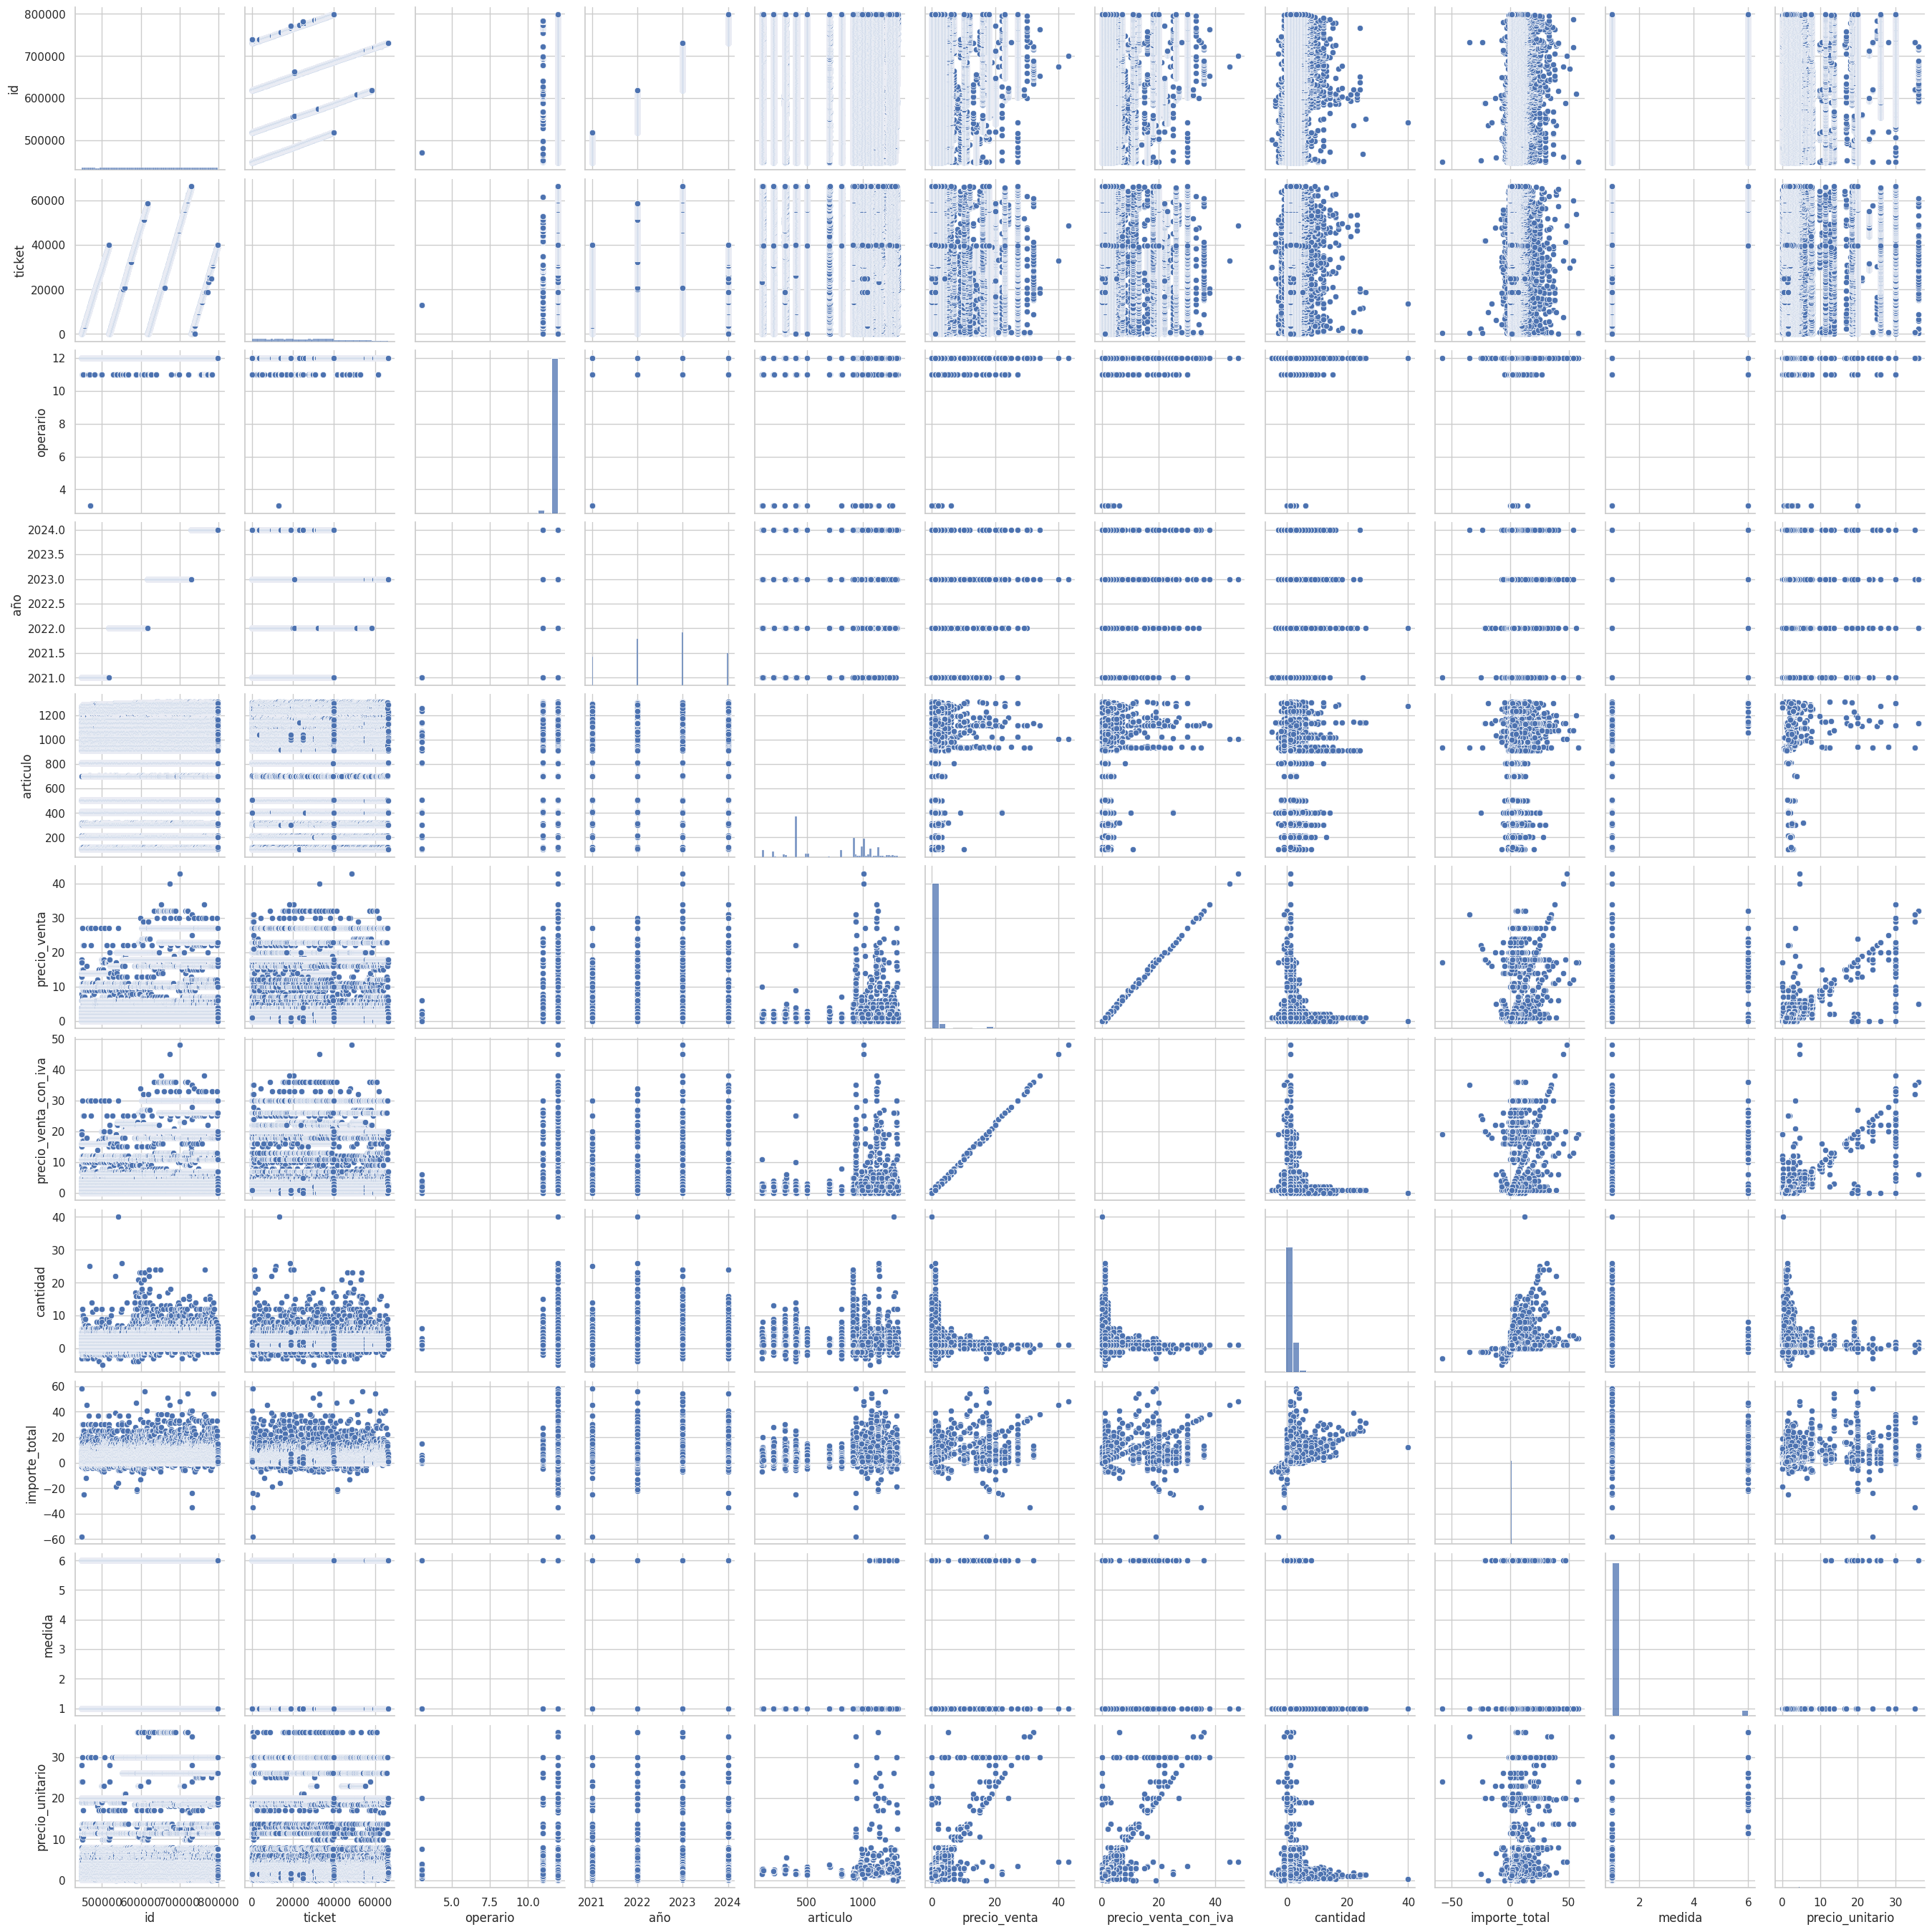

In [ ]:
# Pequeña burrada por mi parte.
sns.pairplot(df);

# Lo mejor que podeis hacer con esto, es imprimirlo
# y enseñarselo a vuestra pareja/familia/profesor diciendo que es un estudio que
# os han hecho de vuestra capacidades cerebrales. Y que segun el mismo estais,
# o no, capacitados para hacer lo que os estan pidiendo. Enmarcarlo o plastificarlo
# y llevarlo a mano para rapido uso en caso de volver a necesitarlo

In [13]:
# Entendiendo como funcionan los cafes por ejemplo
df_cafe = df[df.descripcion.str.contains('Café', na=False)][['precio_venta', 'precio_venta_con_iva', 'cantidad', 'importe_total', 'precio_unitario','descripcion','invitacion','forma_pago']]
df_cafe.sample(20)

,precio_venta,precio_venta_con_iva,cantidad,importe_total,precio_unitario,descripcion,invitacion,forma_pago
203261,1,1,2,3,1.5,Café con leche,N,Efectivo
158708,1,1,1,1,1.5,Café con leche,N,Tarjeta
138176,1,1,1,1,1.5,Café con leche,N,Tarjeta
159963,1,1,1,1,1.5,Café con leche,N,Tarjeta
141474,1,1,2,3,1.5,Café con leche,N,Tarjeta
172165,1,1,1,1,1.5,Café con leche,N,Tarjeta
284396,1,1,1,1,1.5,Café con leche,N,Efectivo
161005,1,1,1,1,1.5,Café con leche,N,Tarjeta
116189,1,2,1,2,2.0,Café Origen Kenya,N,Tarjeta
53283,1,1,1,1,1.5,Café con leche,N,Tarjeta


In [ ]:
# Las versiones unicas
df_cafe.descripcion.unique()

array(['Café con leche', 'Café Spresso', 'Café bombón',
       'Café Origen Jamaica', 'Café origen Colombia',
       'Café Origen Brasil', 'Café Origen Kenya', 'Café Vienes'],
      dtype=object)

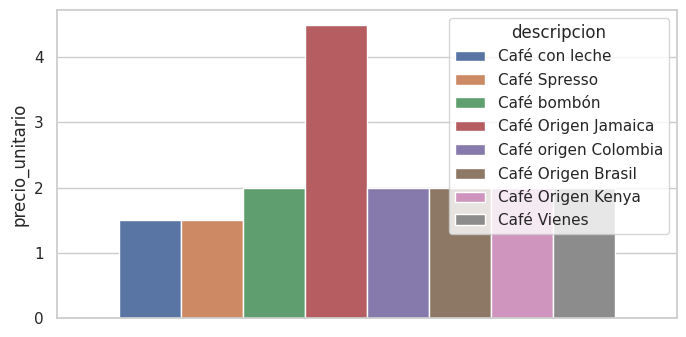

In [15]:
# Que chufla de grafico mas cutre...dejate de tonterias Rubén.
sns.barplot(df_cafe, y='precio_unitario', hue='descripcion');

In [ ]:
# ¿Solo 3 precios unitarios para todos los tipos de cafe? Wao
df_cafe.precio_unitario.unique()

array([1.5, 2. , 4.5])

In [ ]:
# Interesante, no cambia en 3 años.
df[(df['descripcion'] == "Café con leche")].precio_unitario.unique()

array([1.5])

In [ ]:
# Buenas fluctuaciones...
df[(df['descripcion'] == "Café con leche")].precio_venta.unique()

array([ 1,  0, 22,  2,  9,  4])

In [ ]:
# Aun mejores, si es que por eso no me fio de esos campos de enteros ¬¬
df[(df['descripcion'] == "Café con leche")].precio_venta_con_iva.unique()

array([ 1, 25,  0,  2,  3, 10,  4])

In [9]:
# Si... 15 resultados solo. Efectivamente esto son casos unicos o errores.
df[(df['descripcion'] == "Café con leche") & (df['precio_venta_con_iva'] == 25)]

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago
3779,452209,2481,12,2021,2021-02-08,0 days 09:21:44,402.0,22,25,1,25,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta
3787,452225,2490,12,2021,2021-02-08,0 days 10:05:55,402.0,22,25,-1,-25,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta
3789,452227,2491,12,2021,2021-02-08,0 days 10:05:56,402.0,22,25,1,25,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta
18643,472479,14133,12,2021,2021-05-19,0 days 09:15:32,402.0,22,25,1,25,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta
81239,554324,21043,12,2022,2022-05-12,0 days 09:25:27,402.0,22,25,1,25,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta
105749,583316,38536,12,2022,2022-09-15,0 days 09:08:36,402.0,22,25,1,25,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta
123417,604331,50469,12,2022,2022-11-16,0 days 09:13:39,402.0,22,25,1,25,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta
143093,627784,5381,12,2023,2023-01-30,0 days 09:21:57,402.0,22,25,1,25,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta
163754,652194,19733,12,2023,2023-04-03,0 days 11:23:25,402.0,22,25,1,25,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta
184082,676139,33647,12,2023,2023-06-19,0 days 09:14:11,402.0,22,25,1,25,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta


In [ ]:
# Vale, estos registros me estaban mosqueando. Pero los precios raros de
# precio_venta, con iva y total, son gotas de agua en el oceano, en cantidad
# de registros. Lo bueno es que siguen teniendo correcto, aparentemente, el
# precio unitario. Asi que me siento justificado de haberlo usado.
df[(df['descripcion'] == "Café con leche") & (df['precio_venta_con_iva'] == 2)]

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago,importe_total_real,hora_servicio
25026,481106,19056,12,2021,2021-07-04,0 days 11:40:19,402.0,2,2,1,2,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta,1.5,11
30291,490343,24155,12,2021,2021-09-12,0 days 09:32:53,402.0,2,2,1,2,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta,1.5,9
34856,497788,28066,12,2021,2021-10-11,0 days 18:42:48,402.0,1,2,1,2,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta,1.5,18
35344,498405,28388,12,2021,2021-10-14,0 days 09:44:32,402.0,1,2,1,2,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta,1.5,9
47303,513362,36866,12,2021,2021-12-08,0 days 11:30:13,402.0,2,2,1,2,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Tarjeta,1.5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285069,794819,37427,12,2024,2024-07-19,0 days 09:22:12,402.0,2,2,1,2,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Efectivo,1.5,9
285555,795390,37766,12,2024,2024-07-23,0 days 08:58:01,402.0,2,2,1,2,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Efectivo,1.5,8
285896,795776,38002,12,2024,2024-07-24,0 days 11:00:31,402.0,2,2,1,2,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Efectivo,1.5,11
286706,796733,38548,12,2024,2024-07-29,0 days 09:00:45,402.0,1,2,1,2,N,Café con leche,2016-02-15,1.0,1.5,CAFÉS Y ORIGENES,Efectivo,1.5,9


In [ ]:
# Otro que no modifica su precio en 4 años.
df[(df['descripcion'] == "Café Origen Jamaica")].precio_unitario.unique()

array([4.5])

In [11]:
# Ni la tostada tampoco.
df[(df['descripcion'] == "Tostada (tomate y aceite)")].precio_unitario.unique()

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago
19,447857,13,12,2021,2021-01-03,0 days 10:39:00,1017.0,1,1,4,6,N,Tostada (tomate y aceite),2016-05-28,1.0,1.7,ACOMPAÑAR DESAYUNOS,Tarjeta
29,447875,19,12,2021,2021-01-03,0 days 10:46:06,1017.0,1,1,1,1,N,Tostada (tomate y aceite),2016-05-28,1.0,1.7,ACOMPAÑAR DESAYUNOS,Tarjeta
56,447906,37,12,2021,2021-01-03,0 days 11:31:07,1017.0,1,1,1,1,N,Tostada (tomate y aceite),2016-05-28,1.0,1.7,ACOMPAÑAR DESAYUNOS,Tarjeta
88,447941,53,12,2021,2021-01-03,0 days 12:20:12,1017.0,1,1,1,1,N,Tostada (tomate y aceite),2016-05-28,1.0,1.7,ACOMPAÑAR DESAYUNOS,Tarjeta
123,447983,85,12,2021,2021-01-04,0 days 08:54:05,1017.0,1,1,1,1,N,Tostada (tomate y aceite),2016-05-28,1.0,1.7,ACOMPAÑAR DESAYUNOS,Tarjeta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288371,798695,39716,12,2024,2024-08-06,0 days 11:06:54,1017.0,1,1,1,1,N,Tostada (tomate y aceite),2016-05-28,1.0,1.7,ACOMPAÑAR DESAYUNOS,Efectivo
288377,798701,39719,12,2024,2024-08-06,0 days 11:11:57,1017.0,1,1,1,1,N,Tostada (tomate y aceite),2016-05-28,1.0,1.7,ACOMPAÑAR DESAYUNOS,Efectivo
288404,798731,39739,12,2024,2024-08-06,0 days 11:41:23,1017.0,1,1,1,1,N,Tostada (tomate y aceite),2016-05-28,1.0,1.7,ACOMPAÑAR DESAYUNOS,Efectivo
288428,798759,39755,12,2024,2024-08-06,0 days 12:08:32,1017.0,3,4,1,4,N,Tostada (tomate y aceite),2016-05-28,1.0,1.7,ACOMPAÑAR DESAYUNOS,Efectivo


In [ ]:
# Vamos a calcular el numero de "operario" diferentes por año
df.groupby('año')['operario'].nunique()

# Vale, esto me dice que o tenemos na y menos de trabajadores. O que pasa
# como en muchos sitios en los que he programado o ayudado a instalar TPVs.
# Hay una cuenta abierta con un numero en el terminal de la barra, y otra en la
# tablet que lleva el camarero de las mesas. O puede que incluso este metido
# el mismo codigo en varias tablets, si el TPV lo permite.

,operario
año,
2021,3
2022,2
2023,2
2024,2


In [ ]:
# A ver las invitaciones
df.invitacion.unique()

array(['N', 'S'], dtype=object)

In [ ]:
# Hay pocas invitaciones para que influyan en los beneficios para mal o para
# bien, quiza incluso muy poquitas. Asi que se va a quedar asi, no las pienso
# borrar por si acaso importan. Ahora, si son por ticket de sello, ¿Quiza
# se podrian dar unas pocas mas a cambio de subir 5 centimos todos los cafes o
# cosas asi? No se, los de Marketing son los que saben de estas diabluras.
df[df['invitacion']=='S'].shape

(190, 20)

In [ ]:
df.importe_total_real.describe()

,importe_total_real
count,288359.000000
mean,2.914247
std,3.963880
min,-72.000000
25%,1.500000
50%,1.700000
75%,3.000000
max,72.000000


In [ ]:
df[df.index == 150903]

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago,importe_total_real
150903,636953,10905,12,2023,2023-02-22,0 days 13:08:32,1140.0,1,2,1,2,N,Milhojas,2016-09-07,1.0,2.1,"BOLLERÍA, PASTELERIA",Tarjeta,2.1


In [ ]:
df[df.index == 283333]

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago,importe_total_real
283333,792821,36261,12,2024,2024-07-11,0 days 10:27:04,1136.0,18,20,0,1,N,Palmeras jugositas,2016-08-10,6.0,20.0,Pastas y tartas,Efectivo,0.0


In [ ]:
# Vale, despues de varias comprobaciones ahora entiendo los tickets. Basicamente
# no pertenecen todos al mismo albaran, si no que se reinician cada x algo, como
# en una charcuteria. Por eso tenemos el mismo ticket, a lo largo de diferentes
# años. No es que sea una saga alargada hasta la saciedad, como hace Marvel, de
# compra, venta y devolucion de roscones, no.
df[df.ticket == 394]

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago,importe_total_real
552,448473,394,12,2021,2021-01-05,0 days 17:08:12,937.0,17,19,3,58,N,Roscón mediano relleno,2016-04-05,1.0,24.00,PAN,Tarjeta,72.00
553,448474,394,12,2021,2021-01-05,0 days 17:08:12,402.0,1,1,3,3,N,Café con leche,2016-02-15,1.0,1.50,CAFÉS Y ORIGENES,Tarjeta,4.50
554,448475,394,12,2021,2021-01-05,0 days 17:08:12,915.0,0,1,1,1,N,Artesana larga fermentación,2016-04-05,1.0,1.15,PAN,Tarjeta,1.15
555,448476,394,12,2021,2021-01-05,0 days 17:08:12,929.0,1,1,1,1,N,Pan de trigo de espelta,2016-04-05,1.0,1.85,PAN,Tarjeta,1.85
52157,519335,394,12,2022,2022-01-05,0 days 09:03:16,402.0,1,1,2,2,N,Café con leche,2016-02-15,1.0,1.50,CAFÉS Y ORIGENES,Tarjeta,3.00
52158,519337,394,12,2022,2022-01-05,0 days 09:03:17,1017.0,1,1,2,3,N,Tostada (tomate y aceite),2016-05-28,1.0,1.70,ACOMPAÑAR DESAYUNOS,Tarjeta,3.40
52174,519359,394,12,2022,2022-01-05,0 days 09:32:44,911.0,0,0,1,0,N,Barra candeal,2016-04-05,1.0,1.06,PAN,Tarjeta,1.06
52175,519360,394,12,2022,2022-01-05,0 days 09:32:45,920.0,0,0,1,0,N,Chusco integral,2016-04-05,1.0,0.72,PAN,Tarjeta,0.72
135775,619136,394,12,2023,2023-01-03,0 days 18:14:09,505.0,1,1,2,3,N,Infusiones,2016-02-15,1.0,1.40,TE'S,Tarjeta,2.80
135776,619138,394,12,2023,2023-01-03,0 days 18:14:11,402.0,1,1,2,3,N,Café con leche,2016-02-15,1.0,1.50,CAFÉS Y ORIGENES,Tarjeta,3.00


In [ ]:
# Devoluciones o cancelaciones
df[df.ticket == 41742]

,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago,importe_total_real
110422,588889,41742,12,2022,2022-10-03,0 days 08:10:23,1136.0,18,20,-1,-22,N,Palmeras jugositas,2016-08-10,6.0,20.0,Pastas y tartas,Tarjeta,-20.0
110423,588890,41742,12,2022,2022-10-03,0 days 08:10:23,1136.0,18,20,-1,-21,N,Palmeras jugositas,2016-08-10,6.0,20.0,Pastas y tartas,Tarjeta,-20.0
110424,588891,41742,12,2022,2022-10-03,0 days 08:10:23,1136.0,18,20,-1,-21,N,Palmeras jugositas,2016-08-10,6.0,20.0,Pastas y tartas,Tarjeta,-20.0


In [16]:
# Ohh, asi que eso es un Clavileño, interesante, aqui tenemos las pulevas.
df.familia.unique()

array(['PAN', 'INTEGRALES - SIN AZUCAR - NAVIDAD', 'ZUMOS',
       'CAFÉS Y ORIGENES', 'CREPES, TOSTAS, TORTAS',
       'ACOMPAÑAR DESAYUNOS', 'BOLLERÍA, PASTELERIA',
       'CHOCOLATES - BATIDOS', 'PINCHOS', 'CERVEZA, VINO', "TE'S",
       'Pastas y tartas', 'REFRESCOS', 'BOCAPIZZA, SANDWICH Y ENSALADAS',
       'LICORES', 'CHUCHES - BOMBONES', 'SIN GLUTEN',
       'HELADOS SMOOTIES BATIDOS', 'Clavileño', 'BIZCOCHOS TARTAS'],
      dtype=object)

In [19]:
# ¿Y si lo hacemos por meses y top 10 o algo asi de productos en graficos?
df_ventas_descripcion = df.groupby('descripcion').agg({'importe_total_real': 'sum'})
df_ventas_descripcion.sort_values('importe_total_real', ascending=False, inplace=True)
df_ventas_descripcion

,importe_total_real
descripcion,
Café con leche,116743.50
Palmeras jugositas,106700.00
Parisinos,31410.00
Tostada (tomate y aceite),30027.10
Barra candeal,28982.52
...,...
Muffing SIN GLUTEN,2.50
Cerveza 1906 RED 33cl,2.50
Cerveza SIN GLUTEN,2.50


In [ ]:
# Vamos a sacar los graficos del top 10 de productos por mes del año 2021


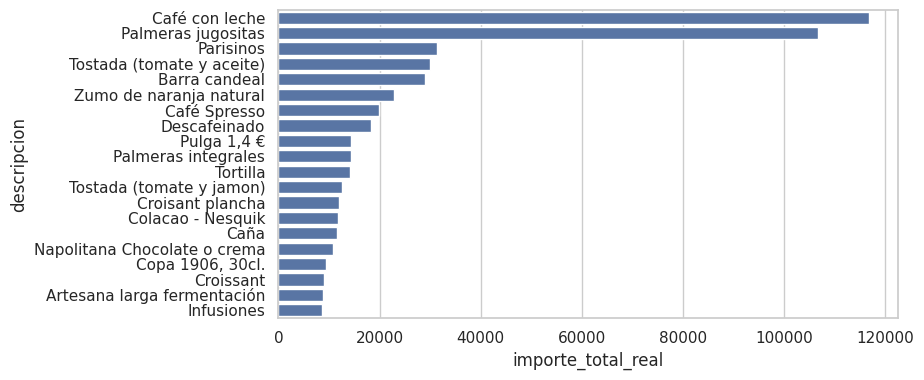

In [125]:
sns.barplot(df_ventas_descripcion.head(20), x='importe_total_real', y=df_ventas_descripcion.head(20).index);

In [137]:
df_ventas_familia = df.groupby('familia').agg({'importe_total_real': 'sum'}).reset_index()
df_ventas_familia.sort_values('importe_total_real', ascending=False, inplace=True)
df_top_ventas_familia = df_ventas_familia.head(10)
df_top_ventas_familia

,familia,importe_total_real
15,Pastas y tartas,184342.30
4,CAFÉS Y ORIGENES,168399.90
0,ACOMPAÑAR DESAYUNOS,98795.00
13,PAN,76500.91
3,"BOLLERÍA, PASTELERIA",48066.55
5,"CERVEZA, VINO",47258.80
14,PINCHOS,42740.65
16,REFRESCOS,34900.75
19,ZUMOS,25456.80
6,CHOCOLATES - BATIDOS,18039.60


<ipython-input-143-8eec5f865099>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_top_ventas_familia, x='importe_total_real', y=df_top_ventas_familia.familia, palette='colorblind')


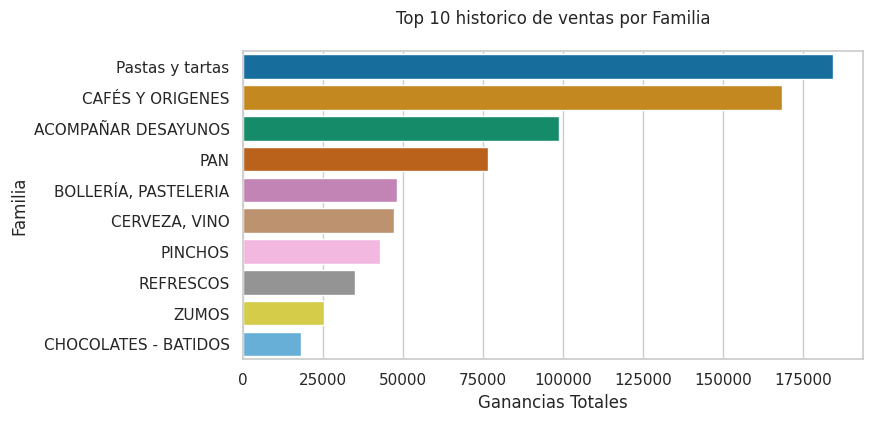

In [143]:
sns.barplot(df_top_ventas_familia, x='importe_total_real', y=df_top_ventas_familia.familia, palette='colorblind')
plt.title('Top 10 historico de ventas por Familia', pad=20)
plt.ylabel('Familia')
plt.xlabel('Ganancias Totales');


In [ ]:
df.groupby('descripcion')['precio_unitario'].agg

,precio_unitario
descripcion,
ANIS,2.75
Agua con gas Magma 50cl.,2.80
"Agua mineral 1,5 L",2.40
Agua mineral 50cl.,1.50
"Alhambra Reserva 1925, botella 33cl.",3.00
...,...
Zumo envase,2.00
crepe salado pollo,4.50
crepe salado verduras,4.20


In [ ]:
df.groupby('descripcion')['precio_unitario'].mean()

,precio_unitario
descripcion,
ANIS,2.75
Agua con gas Magma 50cl.,2.80
"Agua mineral 1,5 L",2.40
Agua mineral 50cl.,1.50
"Alhambra Reserva 1925, botella 33cl.",3.00
...,...
Zumo envase,2.00
crepe salado pollo,4.50
crepe salado verduras,4.20


In [43]:
años = list(df.año.unique())
años

[2021, 2022, 2023, 2024]

<ipython-input-53-fe7cd6a72c52>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='importe_total_real', data=datos_año, palette=colorines, ax=ax)
<ipython-input-53-fe7cd6a72c52>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='importe_total_real', data=datos_año, palette=colorines, ax=ax)
<ipython-input-53-fe7cd6a72c52>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='importe_total_real', data=datos_año, palette=colorines, ax=ax)
<ipython-input-53-fe7cd6a72c52>:29: FutureWarning: 

Passing `palette` witho

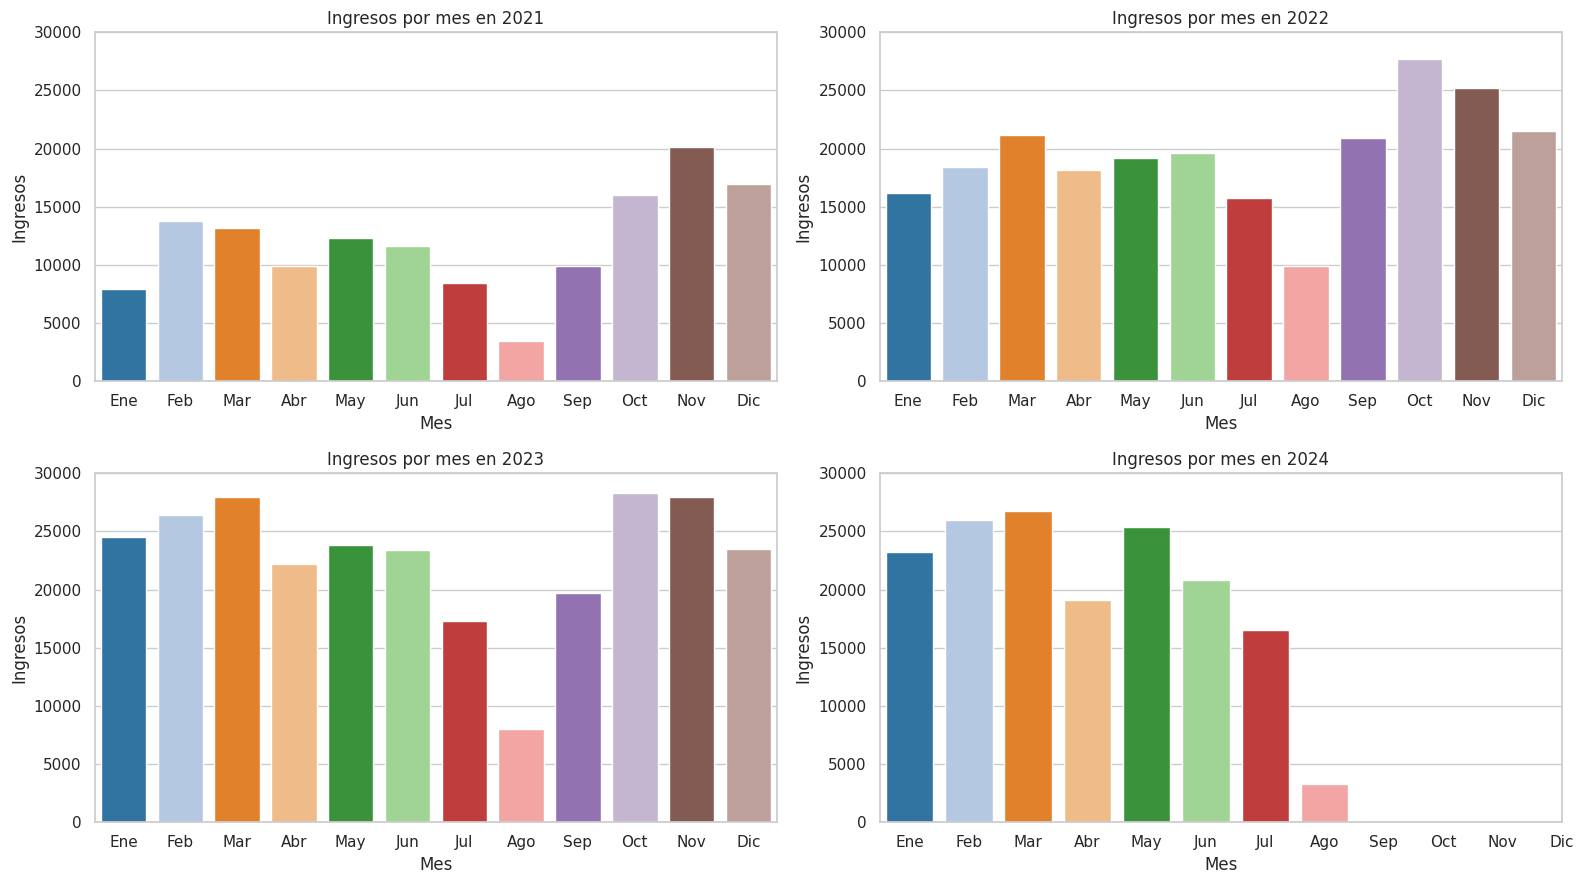

In [53]:
# ¿Y si intento lo de los subplots y saco los ingresos por mes en cada año? Eso
# tiene que molar.

# Le añado la columna mes para no tener que hacer malabares extras
df['mes'] = df['fecha'].dt.month

# Creo un dataframe agrupado por año y mes con el importe total de cada uno
# de estos y le reseteo el indice para que luego no sea una pesadilla acceder
# al mismo
df_ingresos = df.groupby(['año', 'mes'])['importe_total_real'].sum().reset_index()

# Esto es una prueba, no se si saldra bien...
# colorines = sns.color_palette('dark:"Set3"')
# colorines = sns.color_palette("Paired", 12)
colorines = sns.color_palette("tab20", 12)

# Creo un grid de 2x2 y a ojo de buen cubero le digo que tenga tamaño de 16,9...
# por la resolucion de las pantallas y eso...no se si lo estoy haciendo bien.
fig, axs = plt.subplots(2, 2, figsize=(16, 9))

# Creo una lista con el numero de años que tenemos.
años = list(df.año.unique())
# Recorro la lista de años...y su indice, para no tener que crear una i fuera
# del bucle. Esto es vagancia e idea que me dio Victor al enseñarme el iterrow()
for i, año in enumerate(años):
    # Con esto elegimos el subplot que corresponde.
    ax = axs[i // 2, i % 2]
    datos_año = df_ingresos[df_ingresos['año'] == año]
    sns.barplot(x='mes', y='importe_total_real', data=datos_año, palette=colorines, ax=ax)
    ax.set_title(f'Ingresos por mes en {año}')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Ingresos')

    # Esto es parecido a establecer los bins,solo que necesita una lista
    # del numero de trozos que va a reservar, no vale con poner solo un 12
    ax.set_xticks([x for x in range(12)])
    # Le cambio los nombres a las etiquetas para que no sean [0,1,2,...]
    ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    # Ajusto la altura de y artificialmente, despues de conocer que el maximo
    # y asi tengo todos los graficos visualmente parejos.
    ax.set_ylim(0, 30000)

plt.tight_layout()
plt.show();


In [76]:
#Vamos a crear una nueva columna llamada hora_servicio donde guardamos solo los dos ultimos caracteres en orden inverso, de la parte hora en columna df["hora"] en formato entero
df["hora_servicio"] = df["hora"].str.split(":").str[0].str[:-3:-1].str[::-1].astype(int)
df.head()


,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,...,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago,importe_total_real,mes,hora_servicio
0,447834,4,12,2021,2021-01-03,0 days 09:47:38,915.0,0,1,1,...,N,Artesana larga fermentación,2016-04-05,1.0,1.15,PAN,Tarjeta,1.15,1,9
1,447835,4,12,2021,2021-01-03,0 days 09:47:39,911.0,0,0,1,...,N,Barra candeal,2016-04-05,1.0,1.06,PAN,Tarjeta,1.06,1,9
2,447836,4,12,2021,2021-01-03,0 days 09:47:47,1145.0,10,11,0,...,N,Varios articulos peso,2016-09-17,6.0,11.50,INTEGRALES - SIN AZUCAR - NAVIDAD,Tarjeta,11.50,1,9
3,447838,6,12,2021,2021-01-03,0 days 09:52:35,202.0,1,2,2,...,N,Zumo de naranja natural,2016-02-15,1.0,2.20,ZUMOS,Tarjeta,4.40,1,9
4,447840,6,12,2021,2021-01-03,0 days 09:52:38,402.0,1,1,2,...,N,Café con leche,2016-02-15,1.0,1.50,CAFÉS Y ORIGENES,Tarjeta,3.00,1,9


In [ ]:
df.hora_servicio.unique()

array([ 9, 10, 11, 12, 13, 14,  8, 15, 17, 18, 19, 20,  7, 16,  6, 21])

In [ ]:
df[(df.hora_servicio >= 6) & (df.hora_servicio <= 21)].sort_values(by='hora_servicio')


,id,ticket,operario,año,fecha,hora,articulo,precio_venta,precio_venta_con_iva,cantidad,importe_total,invitacion,descripcion,fecha_alta_producto,medida,precio_unitario,familia,forma_pago,hora_servicio
127548,609268,53321,12,2022,2022-11-30,0 days 06:19:35,1074.0,11,12,1,12,N,Pastas grandes,2016-06-29,1.0,13.70,Pastas y tartas,Tarjeta,6
268321,775093,25796,12,2024,2024-05-14,0 days 06:20:21,1136.0,18,20,1,33,N,Palmeras jugositas,2016-08-10,6.0,20.00,Pastas y tartas,Ticket restaurante,6
127547,609267,53321,12,2022,2022-11-30,0 days 06:19:28,1136.0,18,20,1,22,N,Palmeras jugositas,2016-08-10,6.0,20.00,Pastas y tartas,Tarjeta,6
135182,618422,3,11,2023,2023-01-02,0 days 06:28:01,911.0,1,1,1,1,N,Barra candeal,2016-04-05,1.0,1.06,PAN,Tarjeta,6
268320,775092,25796,12,2024,2024-05-14,0 days 06:20:16,1061.0,10,12,1,12,N,Tortilla,2016-06-20,1.0,2.90,PINCHOS,Ticket restaurante,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71722,542920,14195,12,2022,2022-03-29,0 days 21:05:41,1017.0,1,1,-1,-1,N,Tostada (tomate y aceite),2016-05-28,1.0,1.70,ACOMPAÑAR DESAYUNOS,Tarjeta,21
71721,542919,14195,12,2022,2022-03-29,0 days 21:05:41,402.0,1,1,-1,-1,N,Café con leche,2016-02-15,1.0,1.50,CAFÉS Y ORIGENES,Tarjeta,21
41061,505619,32558,12,2021,2021-11-11,0 days 21:08:06,915.0,0,1,1,1,N,Artesana larga fermentación,2016-04-05,1.0,1.15,PAN,Tarjeta,21
79188,551884,19497,12,2022,2022-05-02,0 days 21:04:07,505.0,1,1,1,1,N,Infusiones,2016-02-15,1.0,1.40,TE'S,Tarjeta,21


In [ ]:
df[(df.hora_servicio >= 6) & (df.hora_servicio <= 21)].sort_values(by='hora_servicio').groupby('hora_servicio').agg({'importe_total_real': 'sum'})

,importe_total_real
hora_servicio,
6,118.72
7,439.28
8,68074.61
9,116166.85
10,152174.72
11,158295.72
12,100074.83
13,64809.30
14,67844.11


In [ ]:
pd.options.display.max_rows

60

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df[(df.hora_servicio >= 6) & (df.hora_servicio <= 21)].sort_values(by='hora_servicio').groupby(['año','hora_servicio']).agg({'importe_total_real': 'sum'})

importe_total_real
año  hora_servicio                    
2021 6                           40.00
     7                          360.65
     8                        11118.39
     9                        18401.81
     10                       25883.22
...                                ...
2024 17                        5192.38
     18                        6255.22
     19                        2861.85
     20                         513.59
     21                          -7.50

[64 rows x 1 columns]

In [ ]:
# dejamos display.max_rows en su valor por defecto
pd.reset_option('display.max_rows')

In [54]:
df_ingreso_año = df.groupby('año').agg({'importe_total_real': 'sum'})
df_ingreso_año

,importe_total_real
año,
2021,143588.29
2022,233927.32
2023,273173.42
2024,161110.28


In [69]:
df_ingreso_año['Porcentaje'] = ((df_ingreso_año.importe_total_real / 143588.29) * 100).round(2)
df_ingreso_año = df_ingreso_año.reset_index()
df_ingreso_año

,level_0,index,año,importe_total_real,Porcentaje
0,0,0,2021,143588.29,100.00
1,1,1,2022,233927.32,162.92
2,2,2,2023,273173.42,190.25
3,3,3,2024,161110.28,112.20


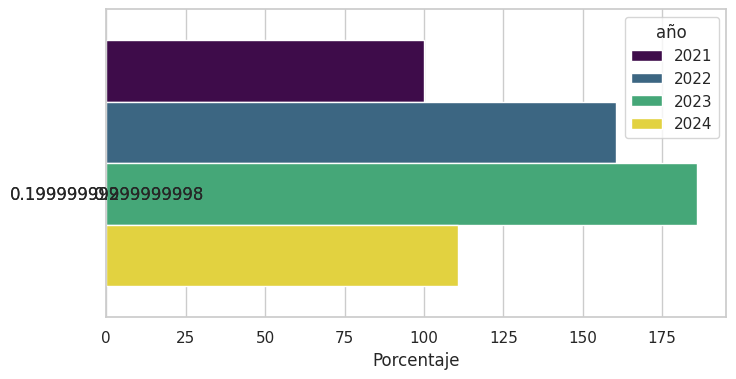

In [ ]:
ax = sns.barplot(data=df_ingreso_año, x=df_ingreso_año.Porcentaje, hue=df_ingreso_año.index, palette='viridis')

for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(p.get_height(), #Estoy añadiendo una etiqueta a cada barra
              (p.get_x()+0.3,
                p.get_height()/2),
                    ha='center',
                    va='center');
  else:
    continue

<ipython-input-73-83b3a83c1392>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='año', y='Porcentaje', data=df_ingreso_año, palette="viridis");


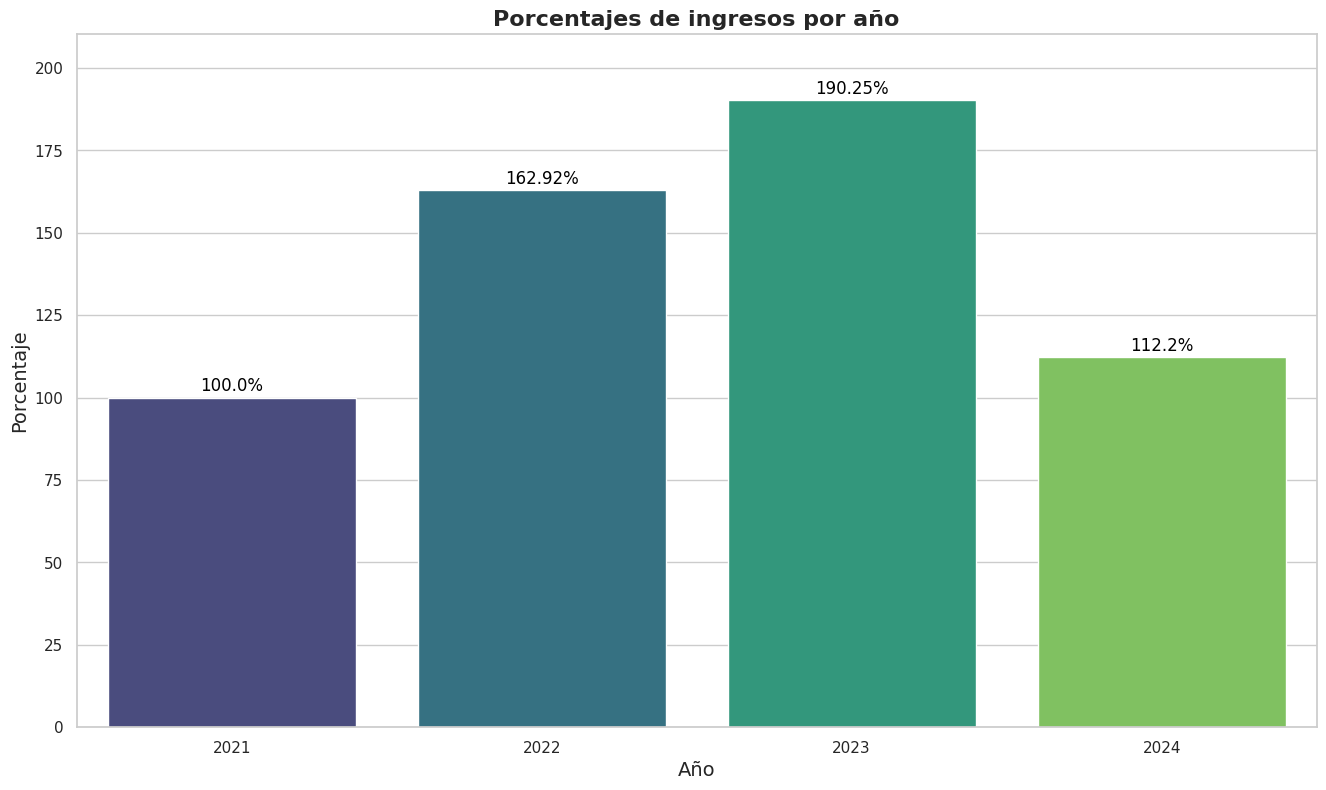

In [73]:
# Creamos el grafico con un tamaño apañado y le ponemos la paleta que le mola
# a Victor Victiridis
plt.figure(figsize=(16, 9));
ax = sns.barplot(x='año', y='Porcentaje', data=df_ingreso_año, palette="viridis");

# Añado las etiquetas de porcentaje a cada columna
for index, row in df_ingreso_año.iterrows():
    ax.text(index, row.Porcentaje + 2, f"{row.Porcentaje}%", color='black', ha="center", fontsize=12);

# Ajustamos cada parametro, incluyendo un minimo al porcentaje para que se pueda
# ver algo de la barra del primero año, que es el 100%
ax.set_title('Porcentajes de ingresos por año', fontsize=16, fontweight='bold')
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Porcentaje', fontsize=14)
ax.set_ylim(0, df_ingreso_año['Porcentaje'].max() + 20)  # Establecer el límite inferior en 0 y un poco de espacio arriba

plt.show();


In [ ]:
# Al anterior dataframe que nos indica las horas de servicio con su importe
# total, vamos a sacar el tanto por ciento importe_total_real por cada hora
total_importe = df[(df.hora_servicio >= 6) & (df.hora_servicio <= 21)]['importe_total_real'].sum()
importe_por_hora = df[(df.hora_servicio >= 6) & (df.hora_servicio <= 21)].sort_values(by='hora_servicio').groupby('hora_servicio').agg({'importe_total_real': 'sum'})
importe_por_hora['porcentaje'] = ((importe_por_hora['importe_total_real'] / total_importe) * 100).round(2)
importe_por_hora

,importe_total_real,porcentaje
hora_servicio,,
6,118.72,0.01
7,439.28,0.05
8,68074.61,8.10
9,116166.85,13.82
10,152174.72,18.11
11,158295.72,18.84
12,100074.83,11.91
13,64809.30,7.71
14,67844.11,8.07


In [78]:
# Ahora quiero sacar un grafico de pastel(pie) para mostrar las franjas...
# aunque seguro que se ve como el culo con todo el texto que estoy poniendo.
# Bueno, luego lo refino.

# Funcion para pasar por el df[hora].apply y sacarnos otra columna con las franjas
def categorizar_horas(hora):
    # afu tantos ifs elifs blifs, si fueran solo dos podria hacerse una...espera
    if 6 <= hora <= 12:
        return 'Desayunos 6-12'
    elif 13 <= hora <= 16:
        return 'Comidas 13-16'
    elif 17 <= hora <= 19:
        return 'Meriendas 17-19'
    else:
        return 'Cenas 20-21'

# Aplicamos la anteriormente explicada funcion y creamos la columna franja
df['franja'] = df['hora_servicio'].apply(categorizar_horas)

# Agrupamos por 'franja' y sumamos el importe_total_real, que deberia ser el
# dinero total que hemos hecho en estos años.
franja_importe = df[(df.hora_servicio >= 6) & (df.hora_servicio <= 21)].groupby('franja').agg({'importe_total_real': 'sum'})

# Calculamos el importe total, para asi poder sacar luego el porcentaje por franja
total_importe = franja_importe['importe_total_real'].sum()

# Calculamos...tio ya lo he dicho en el paso anterior
franja_importe['porcentaje'] = ((franja_importe['importe_total_real'] / total_importe) * 100).round(2)

# Ordenar las franjas de forma adecuada
orden_franjas = ['Desayunos 6-12', 'Comidas 13-16', 'Meriendas 17-19', 'Cenas 20-21']
franja_importe = franja_importe.reindex(orden_franjas)
franja_importe

,importe_total_real,porcentaje
franja,,
Desayunos 6-12,574466.73,70.76
Comidas 13-16,153480.24,18.91
Meriendas 17-19,79957.27,9.85
Cenas 20-21,3895.07,0.48


<ipython-input-144-051c12ac2721>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importe_total_real', y="franja", data=franja_importe, legend = False, palette='colorblind');


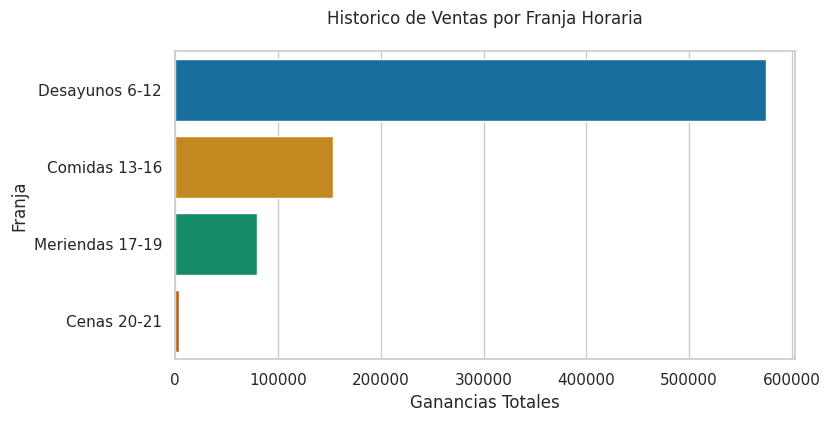

In [144]:
#
sns.barplot(x='importe_total_real', y="franja", data=franja_importe, legend = False, palette='colorblind');
plt.title('Historico de Ventas por Franja Horaria', pad=20)
plt.ylabel('Franja')
plt.xlabel('Ganancias Totales');

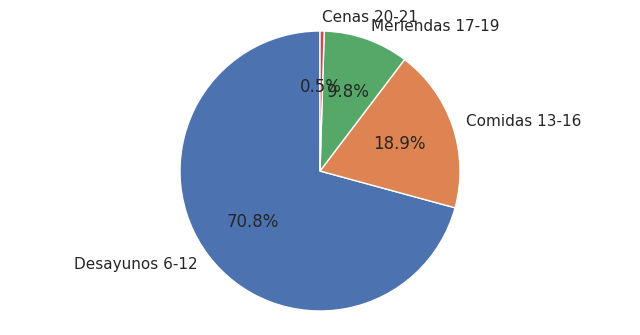

In [80]:
# Creamos un grafico de pie(susio pie) con franja_importe
fig, ax = plt.subplots()
ax.pie(franja_importe['importe_total_real'], labels=franja_importe.index, autopct='%1.1f%%', startangle=90);
ax.axis('equal');

In [81]:
# Definimos las franjas horarias con sus respectivos rangos
def categorizar_franja(hora):
    if 8 <= hora <= 12:
        return 'Desayunos'
    else:
        return 'Resto'

# Aplicamos la función a la columna 'hora_servicio' para crear una nueva columna 'franja2'
df['franja2'] = df['hora_servicio'].apply(categorizar_franja)

# Agrupar por 'franja' y sumar el importe_total_real
franja2_importe = df[(df.hora_servicio >= 6) & (df.hora_servicio <= 21)].groupby('franja2').agg({'importe_total_real': 'sum'})

# Calcular el total de importe_total_real para todas las franjas
total_importe = franja2_importe['importe_total_real'].sum()

# Calcular el porcentaje
franja2_importe['porcentaje'] = ((franja2_importe['importe_total_real'] / total_importe) * 100).round(2)

# Ordenar las franjas de forma adecuada
orden_franjas = ['Desayunos', 'Resto']
franja2_importe = franja2_importe.reindex(orden_franjas)
franja2_importe

,importe_total_real,porcentaje
franja2,,
Desayunos,573908.73,70.7
Resto,237890.58,29.3


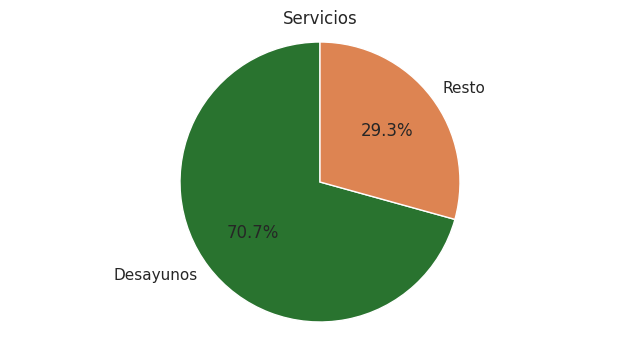

In [82]:
# Creamos un grafico de pie con franja_importe2
fig, ax = plt.subplots()
ax.pie(franja2_importe['importe_total_real'], labels=franja2_importe.index, autopct='%1.1f%%', startangle=90);
# Cambiamos el color de la etiqueta Desayunos a verde en el ax.pie
ax.patches[0].set_facecolor("#29732f")
# Y ahora el titulo...servicios(?)
ax.set_title('Servicios', ha='center', va='center')
ax.axis('equal');

In [86]:
# Definimos las franjas horarias con sus respectivos rangos
def categorizar_franja(hora):
    if 8 <= hora <= 14:
        return 'Franja 8-14'
    else:
        return 'Resto'

# Aplicamos la función a la columna 'hora_servicio' para crear una nueva columna 'franja2'
df['franja3'] = df['hora_servicio'].apply(categorizar_franja)

# Agrupar por 'franja' y sumar el importe_total_real
franja3_importe = df[(df.hora_servicio >= 6) & (df.hora_servicio <= 21)].groupby('franja3').agg({'importe_total_real': 'sum'})

# Calcular el total de importe_total_real para todas las franjas
total_importe = franja3_importe['importe_total_real'].sum()

# Calcular el porcentaje
franja3_importe['porcentaje'] = ((franja3_importe['importe_total_real'] / total_importe) * 100).round(2)

# Ordenar las franjas de forma adecuada
orden_franjas = ['Franja 8-14', 'Resto']
franja3_importe = franja3_importe.reindex(orden_franjas).reset_index()
franja3_importe

,franja3,importe_total_real,porcentaje
0,Franja 8-14,704349.64,86.76
1,Resto,107449.67,13.24


<Figure size 1600x800 with 0 Axes>

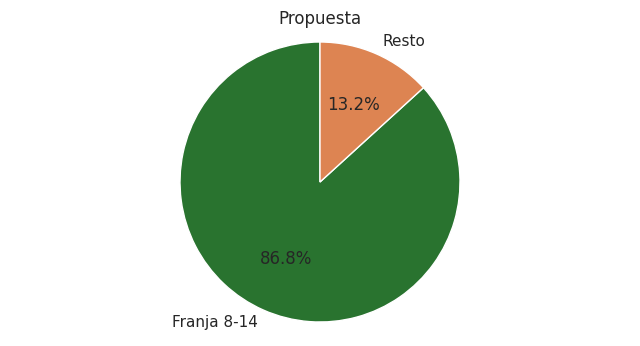

In [88]:
# Creamos un grafico de pie con franja_importe2
plt.figure(figsize=(16, 8))
fig, ax = plt.subplots()
ax.pie(franja3_importe['importe_total_real'], labels=franja3_importe.franja3, autopct='%1.1f%%', startangle=90);
# Cambiamos el color de la etiqueta Desayunos a verde en el ax.pie
ax.patches[0].set_facecolor("#29732f")
# Y ahora el titulo...servicios(?)
ax.set_title('Propuesta', ha='center', va='center')
ax.axis('equal');

In [91]:
# Definimos las franjas horarias con sus respectivos rangos
def categorizar_franja_jornada(row):
    if row == 'Franja 8-14':
        return '8-14(6 Horas)'
    else:
        return 'Resto(10 Horas)'

franja3_importe['jornada'] = franja3_importe.franja3.apply(categorizar_franja_jornada)
franja3_importe

,franja3,importe_total_real,porcentaje,Jornada,jornada
0,Franja 8-14,704349.64,86.76,8-14(6 Horas),8-14(6 Horas)
1,Resto,107449.67,13.24,Resto(10 Horas),Resto(10 Horas)


In [ ]:
df.hora_servicio.nunique()

16

<ipython-input-150-8090915e87c4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importe_total_real', y=franja3_importe.jornada, data=franja3_importe, legend = False, palette='colorblind')


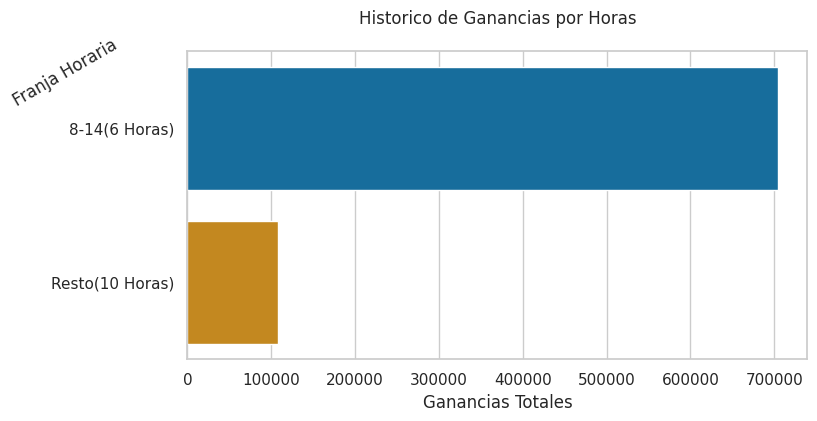

In [150]:
sns.barplot(x='importe_total_real', y=franja3_importe.jornada, data=franja3_importe, legend = False, palette='colorblind')
plt.title('Historico de Ganancias por Horas', pad=20)
plt.ylabel('Franja Horaria',labelpad=-50, rotation=30, loc='top')
plt.xlabel('Ganancias Totales');


In [ ]:
df[(df.hora_servicio >= 14) & (df.hora_servicio <= 15)].sort_values(by='hora_servicio').groupby('familia').agg({'importe_total_real': 'sum'}).sort_values('importe_total_real', ascending=False)

,importe_total_real
familia,
Pastas y tartas,24891.80
"CERVEZA, VINO",22840.85
PAN,14197.61
"BOCAPIZZA, SANDWICH Y ENSALADAS",6722.00
REFRESCOS,5177.60
"BOLLERÍA, PASTELERIA",4487.05
CAFÉS Y ORIGENES,3831.10
ACOMPAÑAR DESAYUNOS,2359.85
INTEGRALES - SIN AZUCAR - NAVIDAD,1838.00


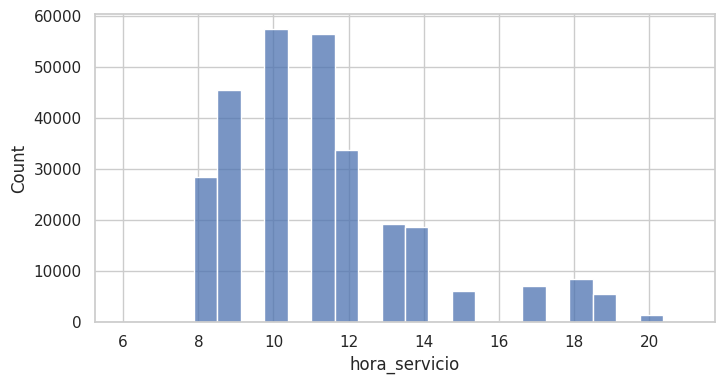

In [ ]:
sns.histplot(x=df.hora_servicio, bins = 24);

In [ ]:
df.groupby('hora_servicio').agg({'id': 'count'}).sort_values('hora_servicio')

,id
hora_servicio,
6,9
7,53
8,28447
9,45520
10,57485
11,56507
12,33684
13,19238
14,18689


In [ ]:
print(f"{round((7064 / df.shape[0]) * 100, 2)}%")

2.45%


<ipython-input-149-6e1e7ac63e0d>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df.hora_servicio, bins = 16, palette="viridis")


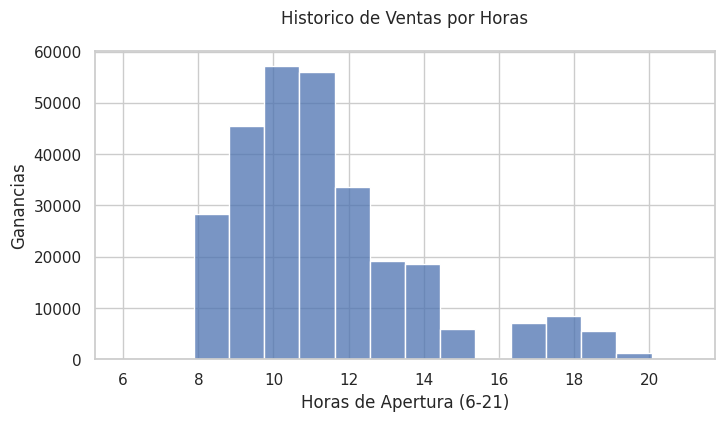

In [149]:
sns.histplot(x=df.hora_servicio, bins = 16, palette="viridis")
ax.set_title('Ventas por hora', ha='center', va='center')
plt.title('Historico de Ventas por Horas', pad=20)
plt.ylabel('Ganancias')
plt.xlabel('Horas de Apertura (6-21)');
ax.axis('equal');

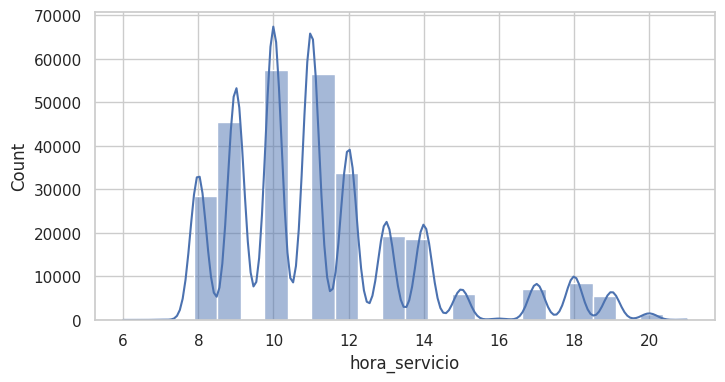

In [ ]:
sns.histplot(x=df.hora_servicio, bins = 24, kde=True);

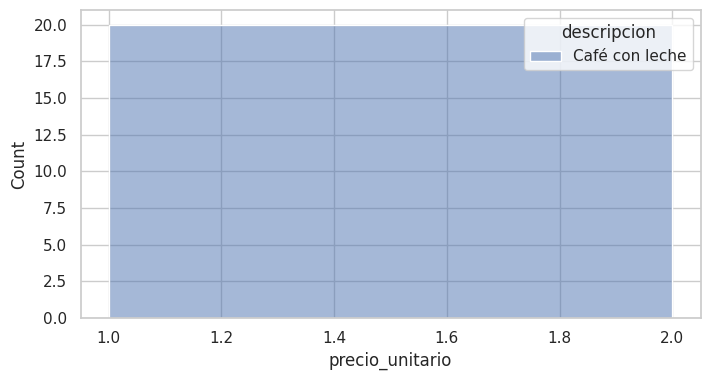

In [ ]:
# Bloooqueeeee :3
sns.histplot(df_cafe, x = 'precio_unitario', hue = 'descripcion');

<ipython-input-127-8358b0a6fed6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importe_total_real', y='descripcion', data=datos_año, palette=colorines, ax=ax)
<ipython-input-127-8358b0a6fed6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importe_total_real', y='descripcion', data=datos_año, palette=colorines, ax=ax)
<ipython-input-127-8358b0a6fed6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importe_total_real', y='descripcion', data=datos_año, palette=colorines, ax=ax)
<ipython-input-127-8358b0a6fed6>:28: FutureWarnin

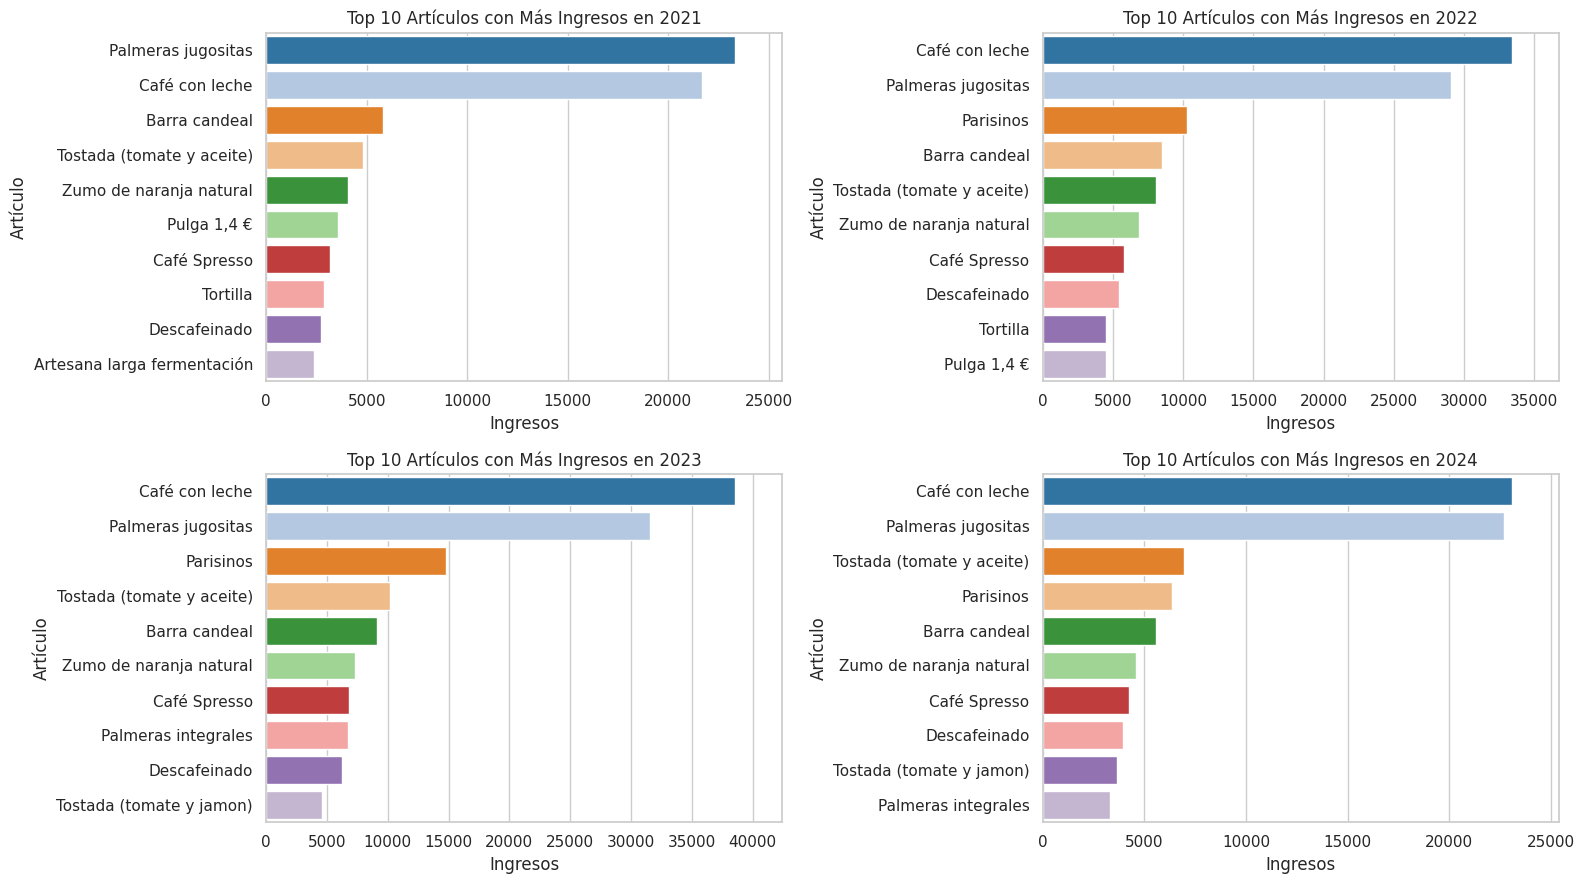

In [127]:
# Agrupamos por año, artículo y descripción para obtener el total de ingresos
df_ingresos = df.groupby(['año', 'articulo', 'descripcion'])['importe_total_real'].sum().reset_index()

años = df['año'].unique()
top_10_articulos = []

for año in años:
    df_año = df_ingresos[df_ingresos['año'] == año]
    top_10 = df_año.nlargest(10, 'importe_total_real')
    top_10 = top_10.sort_values(by='importe_total_real', ascending=False)
    top_10_articulos.append(top_10)

fig, axs = plt.subplots(2, 2, figsize=(16, 9))
colorines = sns.color_palette("tab20", 10)

for i, año in enumerate(años):
    ax = axs[i // 2, i % 2]
    datos_año = top_10_articulos[i]
    sns.barplot(x='importe_total_real', y='descripcion', data=datos_año, palette=colorines, ax=ax)
    ax.set_title(f'Top 10 Artículos con Más Ingresos en {año}')
    ax.set_xlabel('Ingresos')
    ax.set_ylabel('Artículo')
    ax.set_xlim(0, datos_año['importe_total_real'].max() * 1.1)

# Esto por que si no, se montan las etiquetas unas con otras, un barullo vamos
plt.tight_layout()

plt.show()